Notebook to test model B' and analyze the corresponding dataset

In [1]:
import ner
import hcl
import utils

E:\APPLIS\Anaconda3\envs\berthelierex\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


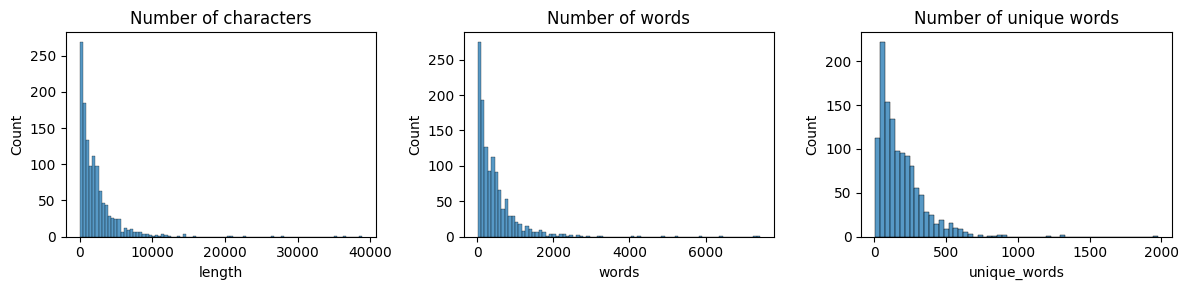

Mean length:  2298.7
Mean number of words:  473.4
Mean number of unique words:  186.8
Size :  (1240, 6)


In [2]:
df = ner.get_ner_df()
hcl.show_df(df,show_labels=False)
print("Size : ",df.shape)

In [3]:
tokenizer = ner.get_ner_tokenizer()
generator = ner.get_ner_generator(tokenizer)

In [9]:
import numpy as np
df = df.iloc[np.where(np.array([len(df["text"][k]) for k in range(100)])<500)]

In [11]:
[len(generator(df["text"][k])) for k in range(27)]

KeyError: 2

In [27]:
seq = df["text"][0]
out = generator(seq)
dec = ner.get_words(tokenizer,seq)
idx,phr = ner.get_idx(out)

[' MAGET , Anne - Sophie', ' 15 / 04 / 2017']


In [59]:
seq.split(" ")

['Prescripteur',
 'autre',
 ':',
 'MAGET',
 ',',
 'Anne',
 '-',
 'Sophie',
 ';',
 'Prescripteur',
 'id',
 ':',
 '71885',
 ';',
 'Type',
 'ordonnance',
 ':',
 'Traitement',
 ';',
 'Autre',
 'type',
 'ordonnance',
 ':',
 'Traitement',
 ';',
 'Date',
 ':',
 '15',
 '/',
 '04',
 '/',
 '2017',
 ';',
 'Prescription',
 '(',
 '1',
 ')',
 ':',
 'Flagyl',
 '500',
 ':',
 '1',
 '.',
 '1',
 '.',
 '1',
 'pdt',
 '15',
 'jours',
 'Oflocet',
 '200',
 'mg',
 ':',
 '1',
 '.',
 '0',
 '.',
 '1',
 'pdt',
 '15',
 'jours',
 'Doliprane',
 '1g',
 ':',
 'un',
 'cp',
 'toutes',
 'les',
 '6h',
 'QSP',
 '15',
 'jours',
 'Tramadol',
 '100mg',
 'LP',
 ':',
 'un',
 'cp',
 'toutes',
 'les',
 '8h',
 'si',
 'douleurs',
 'malgré',
 'doliprane',
 'Primperan',
 '10',
 'mg',
 ':',
 '1',
 '.',
 '1',
 '.',
 '1',
 'si',
 'prise',
 'de',
 'tramadol',
 'et',
 'nausées']

In [60]:
out

[{'entity': 'B-NomPrenom',
  'score': 0.99987745,
  'index': 6,
  'word': '▁MAG',
  'start': 21,
  'end': 24},
 {'entity': 'I-NomPrenom',
  'score': 0.9999219,
  'index': 7,
  'word': 'ET',
  'start': 24,
  'end': 26},
 {'entity': 'I-NomPrenom',
  'score': 0.9999088,
  'index': 8,
  'word': '▁',
  'start': 27,
  'end': 28},
 {'entity': 'I-NomPrenom',
  'score': 0.9999132,
  'index': 9,
  'word': ',',
  'start': 27,
  'end': 28},
 {'entity': 'I-NomPrenom',
  'score': 0.99992037,
  'index': 10,
  'word': '▁Anne',
  'start': 29,
  'end': 33},
 {'entity': 'I-NomPrenom',
  'score': 0.99991894,
  'index': 11,
  'word': '▁-',
  'start': 34,
  'end': 35},
 {'entity': 'I-NomPrenom',
  'score': 0.9999199,
  'index': 12,
  'word': '▁Sophie',
  'start': 36,
  'end': 42},
 {'entity': 'B-Date',
  'score': 0.99988496,
  'index': 36,
  'word': '▁15',
  'start': 146,
  'end': 148},
 {'entity': 'I-Date',
  'score': 0.999869,
  'index': 37,
  'word': '▁/',
  'start': 149,
  'end': 150},
 {'entity': 'I-Da

In [28]:
ner.print_private(seq.split(" "),words=ner.split_words(phr))

Prescripteur autre : MAGET , Anne - Sophie ; Prescripteur id : 71885 ; Type ordonnance : Traitement ; Autre type ordonnance : Traitement ; Date : 15 / 04 / 2017 ; Prescription ( 1 ) : Flagyl 500 : 1 . 1 . 1 pdt 15 jours Oflocet 200 mg : 1 . 0 . 1 pdt 15 jours Doliprane 1g : un cp toutes les 6h QSP 15 jours Tramadol 100mg LP : un cp toutes les 8h si douleurs malgré doliprane Primperan 10 mg : 1 . 1 . 1 si prise de tramadol et nausées


In [30]:
utils.reload(ner)
print(len(dec))
labels = ner.extend_label(tokenizer,seq,df["labels"][0])
len(labels)

145

In [23]:
dec

['<s>',
 'Pre',
 'script',
 'eur',
 'autre',
 ':',
 'MAG',
 'ET',
 '',
 ',',
 'Anne',
 '-',
 'Sophie',
 ';',
 'Pre',
 'script',
 'eur',
 'id',
 ':',
 '7',
 '18',
 '85',
 ';',
 'Type',
 'ordonnance',
 ':',
 'Traitement',
 ';',
 'Autre',
 'type',
 'ordonnance',
 ':',
 'Traitement',
 ';',
 'Date',
 ':',
 '15',
 '/',
 '04',
 '/',
 '2017',
 ';',
 'Pres',
 'cription',
 '(',
 '1',
 ')',
 ':',
 'Fla',
 'gy',
 'l',
 '500',
 ':',
 '1',
 '',
 '.',
 '1',
 '',
 '.',
 '1',
 'p',
 'dt',
 '15',
 'jours',
 'Of',
 'lo',
 'ce',
 't',
 '200',
 'mg',
 ':',
 '1',
 '',
 '.',
 '0',
 '',
 '.',
 '1',
 'p',
 'dt',
 '15',
 'jours',
 'Do',
 'lip',
 'ran',
 'e',
 '1',
 'g',
 ':',
 'un',
 'c',
 'p',
 'toutes',
 'les',
 '6',
 'h',
 'Q',
 'SP',
 '15',
 'jours',
 'Tra',
 'ma',
 'dol',
 '100',
 'mg',
 'L',
 'P',
 ':',
 'un',
 'c',
 'p',
 'toutes',
 'les',
 '8',
 'h',
 'si',
 'douleurs',
 'malgré',
 'd',
 'oli',
 'pr',
 'ane',
 'Prim',
 'per',
 'an',
 '10',
 'mg',
 ':',
 '1',
 '',
 '.',
 '1',
 '',
 '.',
 '1',
 'si',
 'pr

In [46]:
utils.reload(ner)
utils.reload(mlm)
decc = dec[0:2]+["<mask>"]+dec[3:]
sent,sent2 = mlm.recompose_mask(seq,dec,decc)

In [ ]:
sent